# ANALYSIS OF AIR BNB DATA
**Our Objective :** “Analyze NYC Airbnb listings to uncover insights on pricing trends, demand, reviews, and host behavior, and build reports 
to support better hosting and policy decisions making!.”

we have downloaded the dataset from kaagle!

So for any analysis  we need to follow following steps they are: 
- Step 1: **Buissiness problem understanding**
- Step 2:**Data understanding**
- Step 3:**Data pre-processing**
- Step 4:**Analysis**
- Syep 5:**Presentation**

### Step 1: Buissness problem understanding
what is **AIRBNB**?

Airbnb (short for Air Bed & Breakfast) is an **online marketplace** that connects people who want to **rent out their property** with people looking **for accommodations**.
It allows hosts to list their homes, apartments, or rooms for short-term stays, and guests can book these places through the Airbnb website or mobile app.


So now: 


Airbnb has thousands of listings in New York, but:

- Hosts don’t know the right price to set.

- Some areas have high demand, others don’t.

- Reviews affect Price.

👉 The problem is that Airbnb and its hosts need data-driven insights about pricing, demand, and customer preferences to improve bookings and revenue.

### Step 2: Data Understanding

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C://Users//Other users//datascience//projects//data analysis//Air Bnb//Data//raw data//AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date,year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21,2019.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaT,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05,2019.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaT,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaT,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaT,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaT,NaN


In [20]:
summary = (
    df.groupby(['neighbourhood_group', 'year'])
      .agg(
          total_reviews=('number_of_reviews', 'sum'),  # Sum of reviews
          listings=('id', 'count')                     # Count of listings
      )
      .reset_index()
      .sort_values(['neighbourhood_group', 'year'])
)
print(summary)

   neighbourhood_group    year  total_reviews  listings
0                Bronx  2014.0             12         2
1                Bronx  2015.0             17         5
2                Bronx  2016.0             66        14
3                Bronx  2017.0            461        38
4                Bronx  2018.0           1511       119
5                Bronx  2019.0          26304       698
6             Brooklyn  2011.0             35         5
7             Brooklyn  2012.0             46        10
8             Brooklyn  2013.0             95        22
9             Brooklyn  2014.0            402        87
10            Brooklyn  2015.0           2245       621
11            Brooklyn  2016.0           6554      1141
12            Brooklyn  2017.0          12763      1420
13            Brooklyn  2018.0          30348      2675
14            Brooklyn  2019.0         434086     10466
15           Manhattan  2011.0             25         1
16           Manhattan  2012.0            126   

## Analysis of dataframe
total entires=48895 

total columns=16

**we dont need (id,name,host_id,host_name)for analysis. So we will be removing it!**

In [36]:
df=df.drop(columns=["id","name","host_id","host_name"])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [3]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Dividing the variables into different categories
**Categorical variables:** 
- neighbourhood_group
- room_type
- neighbourhood

**Discrete variables:** 
- minimum_nights
- number_of_reviews
- calculated_host_listings_count
- availability_365

**Continuous variables:** 
- price
- reviews_per_month
- latitude
- longitude

# Analysis of  categorical columns:

**neighbourhood_group:**
- no missing values
- Dupliactes are allowed!
- 5 categories(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])
- more records are present in ('Brooklyn', 'Manhattan')

**room_type**:
- no missing values
- dups allowed
- 3 categories (['Private room' 'Entire home/apt' 'Shared room'])
- more records lies in private room , entire home/apt

**neighbourhood:**
- no missing values
- dups allowed
- 221 categories
- most repeated category is "Williamsburg"

# Analysis of Discrete variables
**minimum_nights:**
- No null values
- All are int type
- Dups allowed
- possibility presence of outliers (validate through domain knowledge)
- positively skewed data

**number_of_reviews:**
- No nulls are present
- all are int type
- dups allowed
- possibility presence of outliers (validate through domain knowledge)
- positively skwed data

**calculated_host_listings_count:**
- all are int type
- possibility presence of outliers (validate through domain knowledge)
- no null values are present
- dups allowed
- positively skwed data

**availability_365:**
- no null values are present
- all are int type
- **there is no outlier presence through box plot** 
- dups allowed
- positively skwed data

# Analysis of contionous variables

**price:**
- All are int type
- no null values are present
- may be a presence of outlier (apply winsorization)
- highly +ve skewed data(around +19)
- dups are allowed

**reviews_per_month:**
- missing values are present 
- all are float type
- aftr replacing it with mean check for outliers

**latitude:**
- all are float
- no null values
- no outliers are present ,all are valid data

**longitude:**
- no null are present
- all are float
- no outliers are present , all are valid data

# Below are the Basic analysis/Basic undersating of data variables

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: neighbourhood_group
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


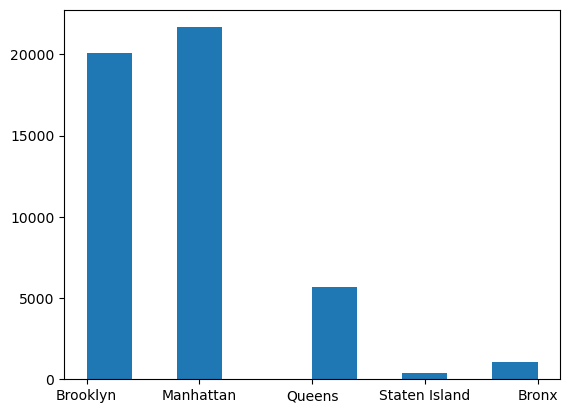

In [3]:
df["neighbourhood_group"].info()
df["neighbourhood_group"].isnull().sum()
print(df["neighbourhood_group"].unique())
import matplotlib.pyplot as plt
plt.hist(df["neighbourhood_group"])
plt.show()

count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object


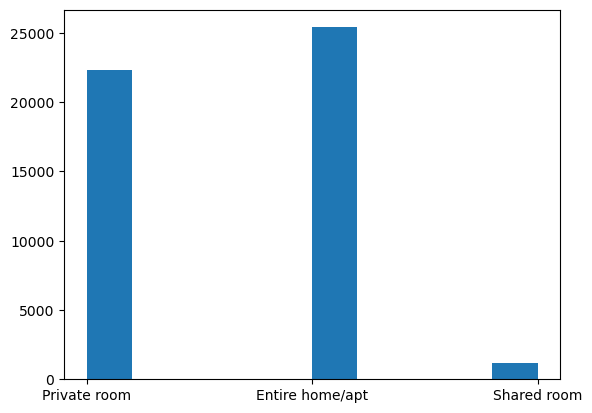

In [4]:
# df["room_type"].info()
print(df["room_type"].describe())
# print(df["room_type"].unique())
import matplotlib.pyplot as plt
plt.hist(df["room_type"])
plt.show()

In [5]:
df["neighbourhood"].info()
df["neighbourhood"].describe()
print(df["neighbourhood"].nunique())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB
221


minimum_nights col info: 
<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: minimum_nights
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
minimum_nights col decribe: 
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
box plot:


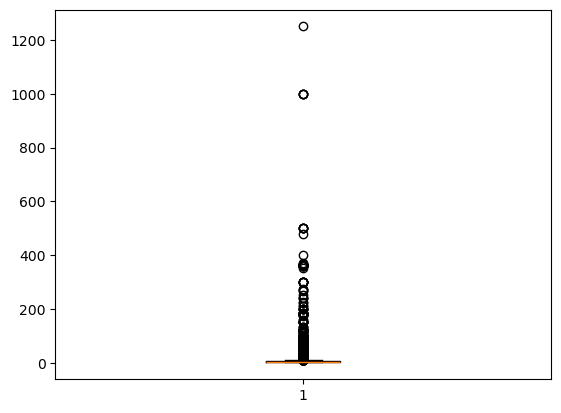

In [5]:
import matplotlib.pyplot as plt
print("======================")
print("minimum_nights col info: ");
print(df["minimum_nights"].info())
print("======================")
print("minimum_nights col decribe: ");
print(df["minimum_nights"].describe())
print("======================")
print("box plot:")
plt.boxplot(df["minimum_nights"])
plt.show()
print("======================")

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: calculated_host_listings_count
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
3.690634571595388


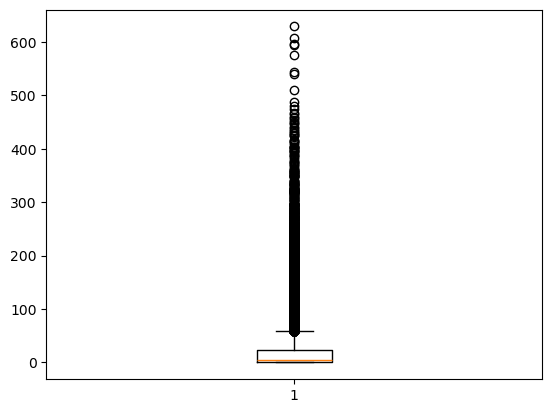

0


In [13]:
print(df["number_of_reviews"].describe())
print(df["calculated_host_listings_count"].info())
print(df["number_of_reviews"].skew())
plt.boxplot(df["number_of_reviews"])
plt.show()
print(df["number_of_reviews"].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: calculated_host_listings_count
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64
461.26262410857635


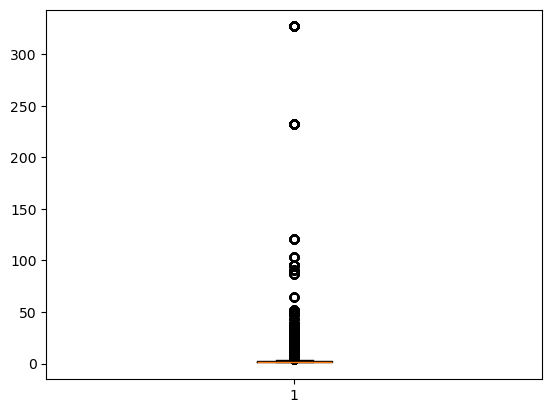

0
7.933173899690269


In [19]:
print(df["calculated_host_listings_count"].info())
print(df["calculated_host_listings_count"].describe())
print((df["calculated_host_listings_count"].std()/df["calculated_host_listings_count"].mean())*100)
plt.boxplot(df["calculated_host_listings_count"])
plt.show()
print(df["calculated_host_listings_count"].isnull().sum())
print(df["calculated_host_listings_count"].skew())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64
116.70574550147764


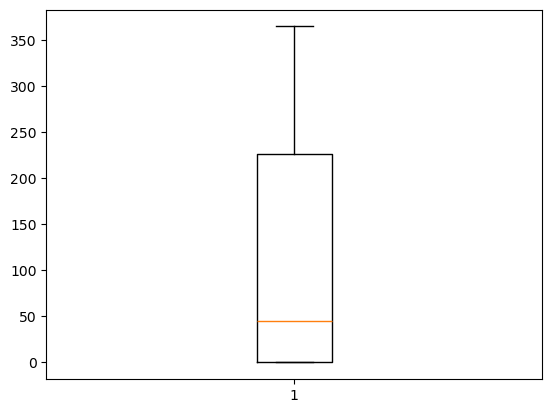

0
0.7634075771134318


In [21]:
print(df["availability_365"].info())
print(df["availability_365"].describe())
print((df["availability_365"].std()/df["availability_365"].mean())*100)
plt.boxplot(df["availability_365"])
plt.show()
print(df["availability_365"].isnull().sum())
print(df["availability_365"].skew())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: price
Non-Null Count  Dtype
--------------  -----
48895 non-null  int64
dtypes: int64(1)
memory usage: 382.1 KB
None
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
157.25058220396673


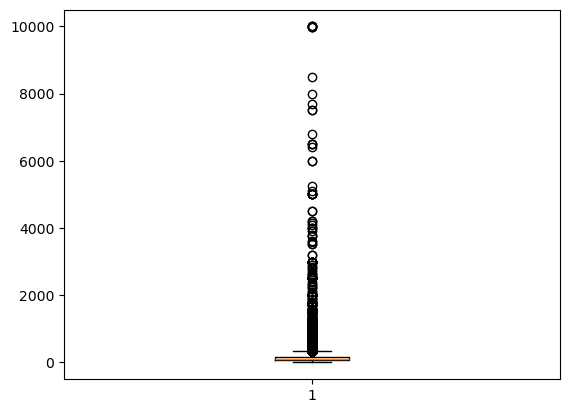

0
19.118938995046033


In [22]:
print(df["price"].info())
print(df["price"].describe())
print((df["price"].std()/df["price"].mean())*100)
plt.boxplot(df["price"])
plt.show()
print(df["price"].isnull().sum())
print(df["price"].skew())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
38843 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB
None
10052
count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64


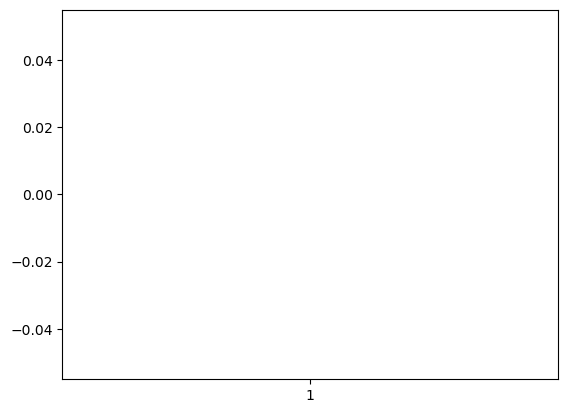

In [27]:
print(df["reviews_per_month"].info())
print(df["reviews_per_month"].isnull().sum())
print(df["reviews_per_month"].describe())
plt.boxplot(df["reviews_per_month"])
plt.show()

In [31]:
df["latitude"].info()
print(df["latitude"].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
48895 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB
count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64


In [34]:
df["longitude"].info()
print(df["longitude"].describe())

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
48895 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB
count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64
